In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
path =r'C:\Users\Nithi\OneDrive\Desktop\Customer Purchasing Behaviors.csv'

df = pd.read_csv(path)

In [8]:
df.head(10)

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13
5,6,41,61000,480,7.8,South,21
6,7,36,54000,400,6.5,West,19
7,8,27,43000,230,4.2,East,14
8,9,50,70000,600,9.0,North,25
9,10,31,50000,320,5.5,South,17


In [16]:
df.shape

(238, 7)

In [24]:
print(df.info())
df_a = df[['age','annual_income','purchase_amount','loyalty_score','purchase_frequency']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB
None


In [18]:
print(df.isnull().sum())


user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64


In [20]:
print(df.describe())


          user_id         age  annual_income  purchase_amount  loyalty_score  \
count  238.000000  238.000000     238.000000       238.000000     238.000000   
mean   119.500000   38.676471   57407.563025       425.630252       6.794118   
std     68.848868    9.351118   11403.875717       140.052062       1.899047   
min      1.000000   22.000000   30000.000000       150.000000       3.000000   
25%     60.250000   31.000000   50000.000000       320.000000       5.500000   
50%    119.500000   39.000000   59000.000000       440.000000       7.000000   
75%    178.750000   46.750000   66750.000000       527.500000       8.275000   
max    238.000000   55.000000   75000.000000       640.000000       9.500000   

       purchase_frequency  
count          238.000000  
mean            19.798319  
std              4.562884  
min             10.000000  
25%             17.000000  
50%             20.000000  
75%             23.000000  
max             28.000000  


In [26]:
correlation_matrix = df_a.corr()


In [28]:
print(correlation_matrix)

                         age  annual_income  purchase_amount  loyalty_score  \
age                 1.000000       0.974833         0.986140       0.981835   
annual_income       0.974833       1.000000         0.984208       0.984351   
purchase_amount     0.986140       0.984208         1.000000       0.994147   
loyalty_score       0.981835       0.984351         0.994147       1.000000   
purchase_frequency  0.980532       0.982920         0.993579       0.986990   

                    purchase_frequency  
age                           0.980532  
annual_income                 0.982920  
purchase_amount               0.993579  
loyalty_score                 0.986990  
purchase_frequency            1.000000  


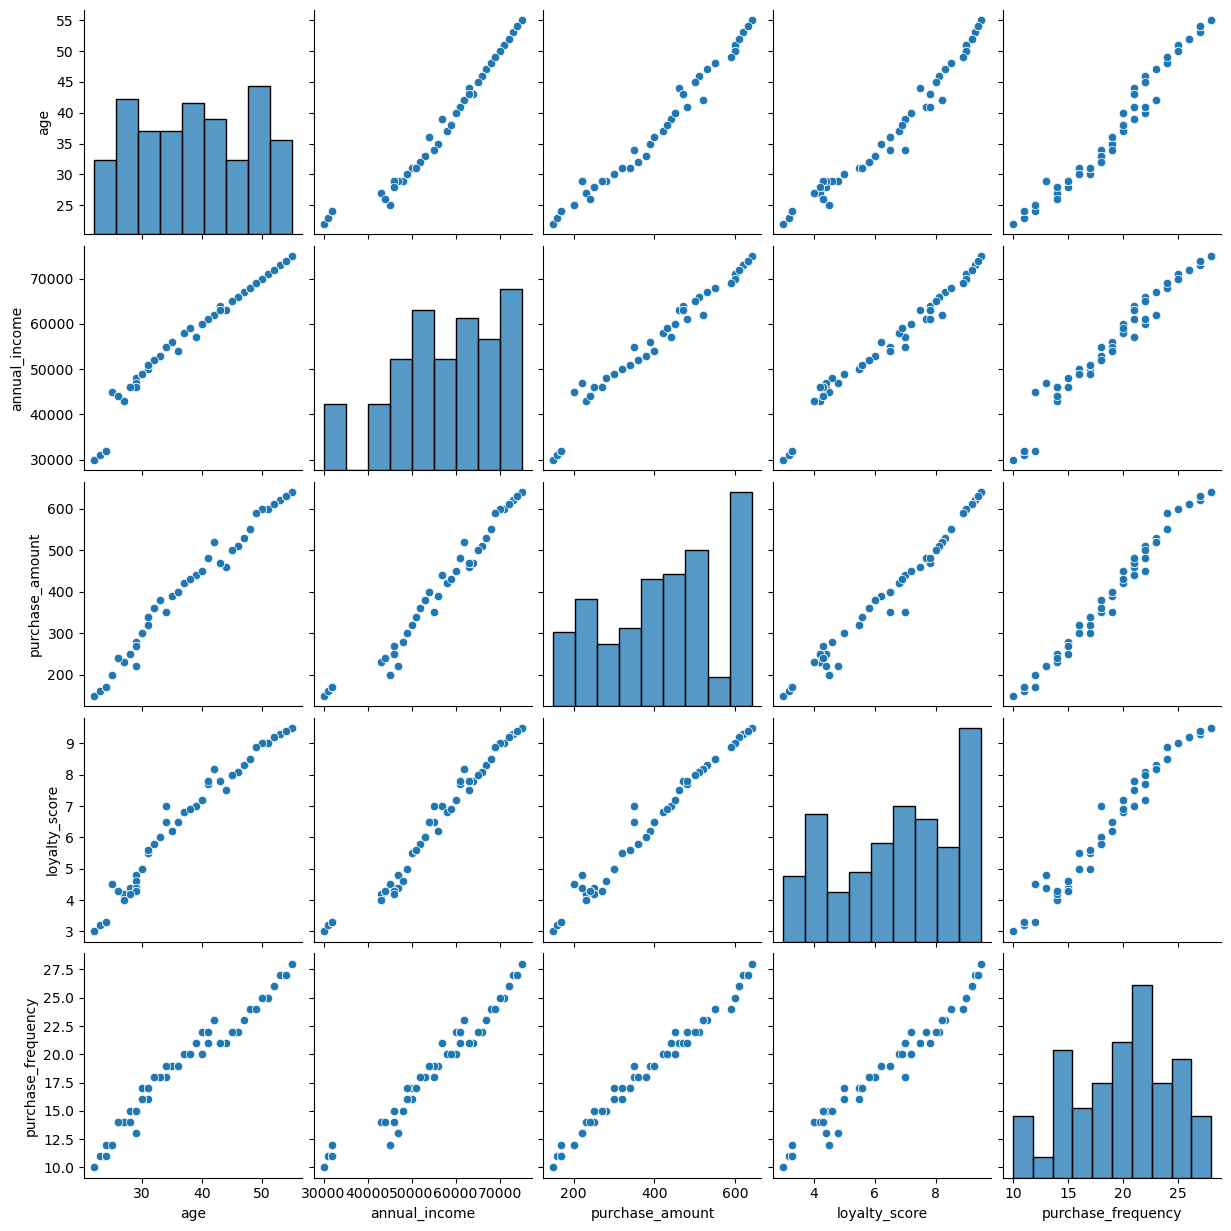

In [30]:
import seaborn as sns
sns.pairplot(df_a)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
X = (df_a['annual_income'])
y = (df_a['loyalty_score'])
print(X.shape)  # Should match with y.shape
print(y.shape)


(238,)
(238,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [76]:
X_train = X_train.values.reshape(-1, 1) if X_train.ndim == 1 else X_train
X_test = X_test.values.reshape(-1, 1) if X_test.ndim == 1 else X_test

In [78]:
y_train = y_train.values if isinstance(y_train, pd.Series) else y_train


In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)    


(166, 1) (166,)
(72, 1) (72,)


In [86]:
y_pred = model.predict(X_test)


In [88]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.13167847281585604
R-squared: 0.9681163542665869


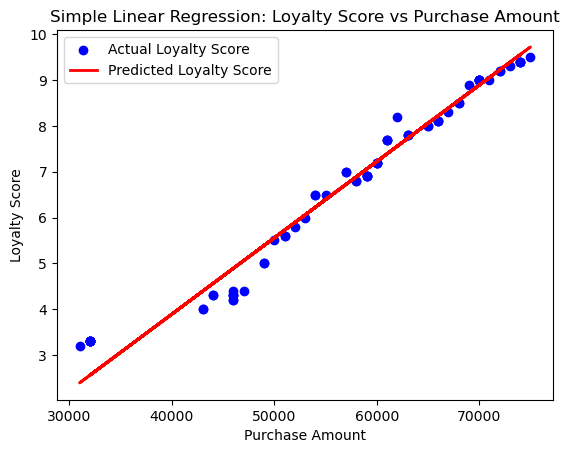

In [90]:
# Plot the regression line with the data
plt.scatter(X_test, y_test, color='blue', label='Actual Loyalty Score')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Loyalty Score')
plt.xlabel('Purchase Amount')
plt.ylabel('Loyalty Score')
plt.title('Simple Linear Regression: Loyalty Score vs Purchase Amount')
plt.legend()
plt.show()


In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Confusion Matrix:
 [[ 0  0]
 [ 0 72]]


Text(45.72222222222221, 0.5, 'True Label')

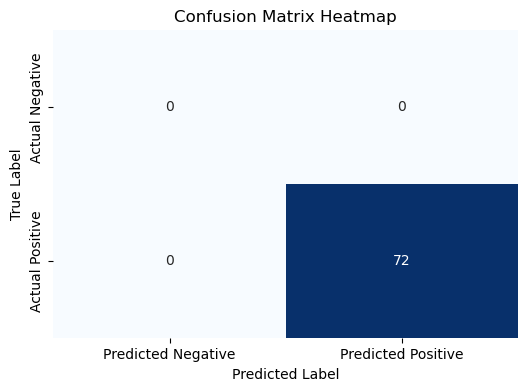

In [145]:
import numpy as np
from sklearn.metrics import confusion_matrix

threshold = 0.5

y_test_classes = (y_test > threshold).astype(int) 

Y_pred_classes = (y_pred > threshold).astype(int)

labels = [0, 1] 

conf_matrix = confusion_matrix(y_test_classes, Y_pred_classes, labels=labels)

print("Confusion Matrix:\n", conf_matrix)
cm = np.array([[0, 0],
               [0, 72]])

plt.figure(figsize=(6, 4)) 
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [121]:
threshold = 5.0  # Define your threshold
y_test_binary = (y_test > threshold).astype(int)


In [123]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_binary, Y_pred_classes, average='binary')  # Specify average if needed
print("F1 Score:", f1)


F1 Score: 0.8292682926829268


In [147]:
predictions = model.predict(np.array([[409900],[48484],[90]])) 
print(predictions)

[65.58115231  5.30453334 -2.76657226]


In [149]:
from joblib import dump

dump(model, 'loyalty_predict_simple_reg.joblib')


['loyalty_predict_simple_reg.joblib']

In [155]:
from joblib import load

model_a = load('loyalty_predict_simple_reg.joblib')


In [159]:
model_a.predict(np.array([[4000],[90],[409900]]))

array([-2.11446615, -2.76657226, 65.58115231])

Note: you may need to restart the kernel to use updated packages.


import requests
import json
ta
input_data = {
    'input_data': [[1, 2, 3, 4]]  # Adjust based on your model's inpurequest
response = requests.post('http://127.0.0.1:5000/predict', json=inpue response
print(response.json())


TypeError: Object of type ndarray is not JSON serializable